In [1005]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1006]:
os.chdir(r'E:\MachineLearning\daata\covidCDC')

In [1007]:
os.listdir()

['COVID-19_Case_Surveillance_Public_Use_Data.csv.crdownload',
 'Covid.csv.crdownload',
 'covid19_sample (1).csv',
 'covid19_sample.csv',
 'data_dictionary_covid_cases_public.xlsx',
 '~$data_dictionary_covid_cases_public.xlsx']

In [1008]:
df=pd.read_csv('covid19_sample (1).csv')

In [1009]:
df.dropna(inplace=True)

In [1010]:
df.head()

,Unnamed: 0,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
5,3671866,7/21/2020,7/12/2020,7/16/2020,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,No
16,3659690,7/15/2020,5/29/2020,5/29/2020,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Yes,Yes
30,4364310,3/16/2020,3/31/2020,3/16/2020,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
34,3266820,5/13/2020,5/6/2020,5/6/2020,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Missing,Missing,Yes,Yes
40,7037643,11/4/2020,10/28/2020,10/29/2020,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,Yes,No


In [1011]:
df.shape

(38911, 12)

In [1012]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [1013]:
df.shape

(38911, 11)

#### df1=df.sample(frac=.02)# for the extraction of fraction of data 

from sklearn.model_selection import train_test_split
df,_=train_test_split(df,test_size=.98,random_state=0)

In [1014]:
# ys=df[df['death_yn'].isin(['Yes'])]
# ns=df[df['death_yn'].isin(['No'])]

In [1015]:
# 1.here we are considering variable Race and ethnicity (combined)

In [1016]:
df['Race and ethnicity (combined)'].value_counts(dropna=False)

White, Non-Hispanic                                     18922
Hispanic/Latino                                          6900
Unknown                                                  6068
Black, Non-Hispanic                                      4166
Multiple/Other, Non-Hispanic                             1105
Asian, Non-Hispanic                                      1100
Native Hawaiian/Other Pacific Islander, Non-Hispanic      237
Missing                                                   210
American Indian/Alaska Native, Non-Hispanic               203
Name: Race and ethnicity (combined), dtype: int64

In [1017]:
df.rename(columns={'Race and ethnicity (combined)':'Race_ethinicity'},inplace=True)

In [1018]:
df['Race_ethinicity'].value_counts(dropna=False)

White, Non-Hispanic                                     18922
Hispanic/Latino                                          6900
Unknown                                                  6068
Black, Non-Hispanic                                      4166
Multiple/Other, Non-Hispanic                             1105
Asian, Non-Hispanic                                      1100
Native Hawaiian/Other Pacific Islander, Non-Hispanic      237
Missing                                                   210
American Indian/Alaska Native, Non-Hispanic               203
Name: Race_ethinicity, dtype: int64

In [1019]:
df1=pd.get_dummies(data=df,columns=['Race_ethinicity'],drop_first=True)

In [1020]:
df1.columns=df1.columns.str.replace(" ","_")
df1.columns=df1.columns.str.replace("-","_")
df1.columns=df1.columns.str.replace(",","_")
df1.columns=df1.columns.str.replace("/","_")

In [1021]:
df1.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethinicity_Asian__Non_Hispanic,Race_ethinicity_Black__Non_Hispanic,Race_ethinicity_Hispanic_Latino,Race_ethinicity_Missing,Race_ethinicity_Multiple_Other__Non_Hispanic,Race_ethinicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethinicity_Unknown,Race_ethinicity_White__Non_Hispanic
5,7/21/2020,7/12/2020,7/16/2020,Laboratory-confirmed case,Female,80+ Years,Yes,Unknown,Yes,No,0,0,0,0,0,0,0,1
16,7/15/2020,5/29/2020,5/29/2020,Laboratory-confirmed case,Male,80+ Years,Missing,Missing,Yes,Yes,0,0,0,0,0,0,0,1
30,3/16/2020,3/31/2020,3/16/2020,Laboratory-confirmed case,Male,70 - 79 Years,Yes,No,Yes,Yes,0,0,0,0,0,0,0,1
34,5/13/2020,5/6/2020,5/6/2020,Laboratory-confirmed case,Male,50 - 59 Years,Missing,Missing,Yes,Yes,0,0,0,0,0,0,0,1
40,11/4/2020,10/28/2020,10/29/2020,Laboratory-confirmed case,Female,20 - 29 Years,No,Missing,Yes,No,0,0,0,0,0,0,0,1


In [1022]:
df.dtypes

cdc_report_dt      object
pos_spec_dt        object
onset_dt           object
current_status     object
sex                object
age_group          object
Race_ethinicity    object
hosp_yn            object
icu_yn             object
death_yn           object
medcond_yn         object
dtype: object

In [1023]:
# 2.Now considering variable cdc_report_dt

In [1024]:
# cdc_report_dt
# q1,q2,q3,q4: jan-mar-q1;apr-jun-q2 etc
# month: is_start_m,end_month,mid_month,salary_day(1-5); second_salary_day (15-20)
# day: weekend,weekday,public_holiday
# hour:early morning,evening...etc
# 

In [1025]:
df1['cdc_report_dt'].dtypes

dtype('O')

In [1026]:
df1['cdc_report_dt']=pd.to_datetime(df1['cdc_report_dt'])

In [1027]:
df1['cdc_report_dt'].dtypes

dtype('<M8[ns]')

In [1028]:
# here we find date format
pd.DataFrame(df1['cdc_report_dt']).iloc[1:3,:]

,cdc_report_dt
16,2020-07-15
30,2020-03-16


In [1029]:
# code to extract quater from date ie cdc_report_dt
pd.DataFrame(df1.cdc_report_dt.dt.quarter).iloc[1:3,:]

,cdc_report_dt
16,3
30,1


In [1030]:
# 2.1Finding quarter from cdc_report_dt

In [1031]:
df1['Quarter']=df1.cdc_report_dt.dt.quarter # to create Quarter column from date column

In [1032]:
df1['Quarter'].value_counts()

3    13002
2    12268
4    11456
1     2185
Name: Quarter, dtype: int64

In [1033]:
df1=pd.get_dummies(data=df1,columns=['Quarter'],drop_first=True)

In [1034]:
df1.head(3)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,...,Race_ethinicity_Black__Non_Hispanic,Race_ethinicity_Hispanic_Latino,Race_ethinicity_Missing,Race_ethinicity_Multiple_Other__Non_Hispanic,Race_ethinicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethinicity_Unknown,Race_ethinicity_White__Non_Hispanic,Quarter_2,Quarter_3,Quarter_4
5,2020-07-21,7/12/2020,7/16/2020,Laboratory-confirmed case,Female,80+ Years,Yes,Unknown,Yes,No,...,0,0,0,0,0,0,1,0,1,0
16,2020-07-15,5/29/2020,5/29/2020,Laboratory-confirmed case,Male,80+ Years,Missing,Missing,Yes,Yes,...,0,0,0,0,0,0,1,0,1,0
30,2020-03-16,3/31/2020,3/16/2020,Laboratory-confirmed case,Male,70 - 79 Years,Yes,No,Yes,Yes,...,0,0,0,0,0,0,1,0,0,0


In [1035]:
#2.2 way to get monthly category
df1['mon_cat']=df1.cdc_report_dt.dt.day

In [1036]:
df1['mon_cat'].value_counts()

17    1751
14    1751
13    1700
10    1638
19    1620
9     1559
4     1497
1     1375
5     1338
2     1334
24    1329
12    1274
26    1259
20    1250
30    1214
16    1210
6     1201
7     1198
18    1145
28    1128
3     1127
29    1116
27    1106
15    1105
23    1083
8     1040
11    1020
25    1013
21     935
22     921
31     674
Name: mon_cat, dtype: int64

In [1037]:
# function to apply on mon_cat varible
def Mo_cat(i):
    if i in range(1,11):
        return 'Month_Start'
    elif i in [25,26,27,28,29,30,31]:
        return 'Month_End'
    else:
        return 'Month_Mid'

In [1038]:
df1['mon_cat']=df1['mon_cat'].apply(Mo_cat)

In [1039]:
df1['mon_cat'].value_counts()

Month_Mid      18094
Month_Start    13307
Month_End       7510
Name: mon_cat, dtype: int64

In [1040]:
df1=pd.get_dummies(data=df_final1,columns=['mon_cat'],drop_first=True)

In [1041]:
df1.head()

,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethinicity_Asian__Non_Hispanic,Race_ethinicity_Black__Non_Hispanic,...,Race_ethinicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethinicity_Unknown,Race_ethinicity_White__Non_Hispanic,Quarter_2,Quarter_3,Quarter_4,Day_Cat_Weekend,Month_Cat,mon_cat_Month_Mid,mon_cat_Month_Start
0,2020-07-22,Laboratory-confirmed case,Female,70 - 79 Years,Yes,Missing,Yes,Missing,0,0,...,0,0,1,0,1,0,0,Month_Mid,1,0
1,2020-08-07,Laboratory-confirmed case,Female,80+ Years,Yes,Unknown,Yes,Missing,0,0,...,0,0,1,0,1,0,0,Month_Mid,0,1
2,2020-03-31,Laboratory-confirmed case,Male,70 - 79 Years,Yes,No,Yes,Yes,0,0,...,0,0,1,0,0,0,0,Month_Mid,0,0
3,2020-08-11,Laboratory-confirmed case,Female,80+ Years,Yes,Unknown,Yes,Yes,0,1,...,0,0,0,0,1,0,0,Month_Mid,1,0
4,2020-04-18,Probable Case,Female,50 - 59 Years,Unknown,Unknown,Yes,Unknown,1,0,...,0,0,0,1,0,0,1,Month_Mid,1,0


In [1102]:
# 2.3 to get whether day is weekday or weekend
df1['Day_Cat']=df1.cdc_report_dt.dt.weekday 

In [1103]:
def day_cate(i):
    if i in [0,1,2,3,4]:
        return 'Weekday'
    else:
        return 'Weekend'

In [1104]:
df1['Day_Cat'].value_counts()

2    37372
1    29241
0    27831
3    24210
6    22150
4    21904
5    21447
Name: Day_Cat, dtype: int64

In [1105]:
df1['Day_Cat']=df1['Day_Cat'].apply(day_cate)

In [1106]:
df1['Day_Cat'].value_counts()

Weekday    140558
Weekend     43597
Name: Day_Cat, dtype: int64

In [1107]:
df1=pd.get_dummies(data=df1,columns=['Day_Cat'],drop_first=True)

In [1108]:
df1.head(4)

,cdc_report_dt,age_group,hosp_yn,icu_yn,medcond_yn,Race_ethinicity_Asian__Non_Hispanic,Race_ethinicity_Black__Non_Hispanic,Race_ethinicity_Hispanic_Latino,Race_ethinicity_Missing,Race_ethinicity_Multiple_Other__Non_Hispanic,...,age_cate_Unkown,age_cate_Young,hospit_Unkown,hospit_YES,In_ICU_Unkown,In_ICU_YES,death_yn_Yes,MediCondi_Unkown,MediCondi_YES,Day_Cat_Weekend
0,2020-07-22,70 - 79 Years,Yes,Missing,Missing,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
1,2020-08-07,80+ Years,Yes,Unknown,Missing,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
2,2020-03-31,70 - 79 Years,Yes,No,Yes,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,2020-08-11,80+ Years,Yes,Unknown,Yes,0,1,0,0,0,...,0,0,0,1,1,0,1,0,1,0


In [1049]:
# 3 now variable is 'current_status'

In [1050]:
df1['current_status'].value_counts()

Laboratory-confirmed case    173359
Probable Case                 10796
Name: current_status, dtype: int64

This has two categories therefore converting into binary 

In [1051]:
df1=pd.get_dummies(data=df1,columns=['current_status'],drop_first=True)

In [1052]:
df1.columns=df1.columns.str.replace("-","_")
df1.columns=df1.columns.str.replace(" ","_")

In [1053]:
df1.head(3)

,cdc_report_dt,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethinicity_Asian__Non_Hispanic,Race_ethinicity_Black__Non_Hispanic,Race_ethinicity_Hispanic_Latino,...,Race_ethinicity_White__Non_Hispanic,Quarter_2,Quarter_3,Quarter_4,Day_Cat_Weekend,Month_Cat,mon_cat_Month_Mid,mon_cat_Month_Start,Day_Cat_Weekend,current_status_Probable_Case
0,2020-07-22,Female,70 - 79 Years,Yes,Missing,Yes,Missing,0,0,0,...,1,0,1,0,0,Month_Mid,1,0,0,0
1,2020-08-07,Female,80+ Years,Yes,Unknown,Yes,Missing,0,0,0,...,1,0,1,0,0,Month_Mid,0,1,0,0
2,2020-03-31,Male,70 - 79 Years,Yes,No,Yes,Yes,0,0,0,...,1,0,0,0,0,Month_Mid,0,0,0,0


In [1054]:
# 4 now variable is 'sex'

In [1055]:
df1['sex'].value_counts()

Female     92108
Male       91269
Unknown      537
Missing      238
Other          2
Name: sex, dtype: int64

since there are in general three categories in sex variable therfore combining the unkown and Missing cat into one

In [1056]:
df1['sex']=np.where(df1['sex']=='Male','Male',
                    np.where(df1['sex']=='Female','Female','others'))

In [1057]:
df1['sex'].value_counts()


Female    92108
Male      91269
others      778
Name: sex, dtype: int64

In [1058]:
df1=pd.get_dummies(data=df1,columns=['sex'],drop_first=True)

In [1059]:
df1.head()

,cdc_report_dt,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethinicity_Asian__Non_Hispanic,Race_ethinicity_Black__Non_Hispanic,Race_ethinicity_Hispanic_Latino,Race_ethinicity_Missing,...,Quarter_3,Quarter_4,Day_Cat_Weekend,Month_Cat,mon_cat_Month_Mid,mon_cat_Month_Start,Day_Cat_Weekend,current_status_Probable_Case,sex_Male,sex_others
0,2020-07-22,70 - 79 Years,Yes,Missing,Yes,Missing,0,0,0,0,...,1,0,0,Month_Mid,1,0,0,0,0,0
1,2020-08-07,80+ Years,Yes,Unknown,Yes,Missing,0,0,0,0,...,1,0,0,Month_Mid,0,1,0,0,0,0
2,2020-03-31,70 - 79 Years,Yes,No,Yes,Yes,0,0,0,0,...,0,0,0,Month_Mid,0,0,0,0,1,0
3,2020-08-11,80+ Years,Yes,Unknown,Yes,Yes,0,1,0,0,...,1,0,0,Month_Mid,1,0,0,0,0,0
4,2020-04-18,50 - 59 Years,Unknown,Unknown,Yes,Unknown,1,0,0,0,...,0,0,1,Month_Mid,1,0,1,1,0,0


In [1060]:
# 5 here variable is age_group
df1['age_group'].value_counts()

80+ Years        37917
70 - 79 Years    24085
60 - 69 Years    23112
20 - 29 Years    22170
50 - 59 Years    21916
30 - 39 Years    19374
40 - 49 Years    19255
10 - 19 Years    11770
0 - 9 Years       4413
Unknown            139
Name: age_group, dtype: int64

In [1061]:
df1['age_code']=pd.factorize(df1.age_group)[0]

In [1062]:
df1.loc[:,['age_group','age_code']].value_counts()

age_group      age_code
80+ Years      1           37917
70 - 79 Years  0           24085
60 - 69 Years  3           23112
20 - 29 Years  5           22170
50 - 59 Years  2           21916
30 - 39 Years  6           19374
40 - 49 Years  4           19255
10 - 19 Years  8           11770
0 - 9 Years    7            4413
Unknown        9             139
dtype: int64

In [1063]:
def age_cat(x):
    if x in [1,0,3]:
        return 'SrCitz'
    elif x in [2,4]:
        return 'Adult'
    elif x in [6,5]:
        return 'Young'
    elif x in [7,8]:
        return 'Chdr&teen'
    elif x == 9:
        return 'Unkown'

In [1064]:
df1['age_cate']=df1['age_code'].apply(age_cat)

In [1065]:
df1=pd.get_dummies(data=df1,columns=['age_cate'],drop_first=True)

In [1066]:
# 6 here we are considering variable name as hosp_yn

In [1067]:
df1['hosp_yn'].value_counts()

No         91217
Yes        53384
Unknown    20043
Missing    19511
Name: hosp_yn, dtype: int64

In [1068]:
df1['hospit']=np.where(df1['hosp_yn']=='No','NO',
                        np.where(df1['hosp_yn']=='Yes','YES','Unkown'))

In [1069]:
df1['hospit'].value_counts()

NO        91217
YES       53384
Unkown    39554
Name: hospit, dtype: int64

In [1070]:
df1=pd.get_dummies(data=df1,columns=['hospit'],drop_first=True)

In [1071]:
# 7 now the variabel is icu_yn

In [1072]:
df1['icu_yn'].value_counts()

Missing    103731
Unknown     42300
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [1073]:
df1['In_ICU']=np.where(df1['icu_yn']=='No','NO',
                        np.where(df1['icu_yn']=='Yes','YES','Unkown'))

In [1074]:
df1['In_ICU'].value_counts()

Unkown    146031
NO         27584
YES        10540
Name: In_ICU, dtype: int64

In [1075]:
df1=pd.get_dummies(data=df1,columns=['In_ICU'],drop_first=True)

In [1076]:
# 8 now the variabel is death_yn

In [1077]:
df1['death_yn'].value_counts()

No     110724
Yes     73431
Name: death_yn, dtype: int64

In [1078]:
df1=pd.get_dummies(data=df1,columns=['death_yn'],drop_first=True)

In [1079]:
# 9 now the variabel is medcond_yn

In [1080]:
df1['medcond_yn'].value_counts()

Missing    101496
Yes         42408
Unknown     21830
No          18421
Name: medcond_yn, dtype: int64

In [1081]:
df1['MediCondi']=np.where(df1['medcond_yn']=='No','NO',
                        np.where(df1['medcond_yn']=='Yes','YES','Unkown'))

In [1082]:
df1['MediCondi'].value_counts()

Unkown    123326
YES        42408
NO         18421
Name: MediCondi, dtype: int64

In [1083]:
df1=pd.get_dummies(data=df1,columns=['MediCondi'],drop_first=True)

In [1084]:
df1.head()

,cdc_report_dt,age_group,hosp_yn,icu_yn,medcond_yn,Race_ethinicity_Asian__Non_Hispanic,Race_ethinicity_Black__Non_Hispanic,Race_ethinicity_Hispanic_Latino,Race_ethinicity_Missing,Race_ethinicity_Multiple_Other__Non_Hispanic,...,age_cate_SrCitz,age_cate_Unkown,age_cate_Young,hospit_Unkown,hospit_YES,In_ICU_Unkown,In_ICU_YES,death_yn_Yes,MediCondi_Unkown,MediCondi_YES
0,2020-07-22,70 - 79 Years,Yes,Missing,Missing,0,0,0,0,0,...,1,0,0,0,1,1,0,1,1,0
1,2020-08-07,80+ Years,Yes,Unknown,Missing,0,0,0,0,0,...,1,0,0,0,1,1,0,1,1,0
2,2020-03-31,70 - 79 Years,Yes,No,Yes,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
3,2020-08-11,80+ Years,Yes,Unknown,Yes,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,1
4,2020-04-18,50 - 59 Years,Unknown,Unknown,Unknown,1,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0


In [1085]:
df1.dtypes

cdc_report_dt                                                           datetime64[ns]
age_group                                                                       object
hosp_yn                                                                         object
icu_yn                                                                          object
medcond_yn                                                                      object
Race_ethinicity_Asian__Non_Hispanic                                              uint8
Race_ethinicity_Black__Non_Hispanic                                              uint8
Race_ethinicity_Hispanic_Latino                                                  uint8
Race_ethinicity_Missing                                                          uint8
Race_ethinicity_Multiple_Other__Non_Hispanic                                     uint8
Race_ethinicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic             uint8
Race_ethinicity_Unknown                    

In [1086]:
df1.columns

Index(['cdc_report_dt', 'age_group', 'hosp_yn', 'icu_yn', 'medcond_yn',
       'Race_ethinicity_Asian__Non_Hispanic',
       'Race_ethinicity_Black__Non_Hispanic',
       'Race_ethinicity_Hispanic_Latino', 'Race_ethinicity_Missing',
       'Race_ethinicity_Multiple_Other__Non_Hispanic',
       'Race_ethinicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethinicity_Unknown', 'Race_ethinicity_White__Non_Hispanic',
       'Quarter_2', 'Quarter_3', 'Quarter_4', 'Day_Cat_Weekend', 'Month_Cat',
       'mon_cat_Month_Mid', 'mon_cat_Month_Start', 'Day_Cat_Weekend',
       'current_status_Probable_Case', 'sex_Male', 'sex_others', 'age_code',
       'age_cate_Chdr&teen', 'age_cate_SrCitz', 'age_cate_Unkown',
       'age_cate_Young', 'hospit_Unkown', 'hospit_YES', 'In_ICU_Unkown',
       'In_ICU_YES', 'death_yn_Yes', 'MediCondi_Unkown', 'MediCondi_YES'],
      dtype='object')

In [1087]:
df2=df1[['Race_ethinicity_Asian__Non_Hispanic',
       'Race_ethinicity_Black__Non_Hispanic',
       'Race_ethinicity_Hispanic_Latino', 'Race_ethinicity_Missing',
       'Race_ethinicity_Multiple_Other__Non_Hispanic',
       'Race_ethinicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethinicity_Unknown', 'Race_ethinicity_White__Non_Hispanic',
       'Quarter_2', 'Quarter_3', 'Quarter_4',
       'mon_cat_Month_Mid', 'mon_cat_Month_Start', 'Day_Cat_Weekend',
       'current_status_Probable_Case', 'sex_Male', 'sex_others',
       'age_cate_Chdr&teen', 'age_cate_SrCitz', 'age_cate_Unkown',
       'age_cate_Young', 'hospit_Unkown', 'hospit_YES', 'In_ICU_Unkown',
       'In_ICU_YES', 'death_yn_Yes', 'MediCondi_Unkown', 'MediCondi_YES'
       ]]

In [1088]:
df2.head()

,Race_ethinicity_Asian__Non_Hispanic,Race_ethinicity_Black__Non_Hispanic,Race_ethinicity_Hispanic_Latino,Race_ethinicity_Missing,Race_ethinicity_Multiple_Other__Non_Hispanic,Race_ethinicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethinicity_Unknown,Race_ethinicity_White__Non_Hispanic,Quarter_2,Quarter_3,...,age_cate_SrCitz,age_cate_Unkown,age_cate_Young,hospit_Unkown,hospit_YES,In_ICU_Unkown,In_ICU_YES,death_yn_Yes,MediCondi_Unkown,MediCondi_YES
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,1,0,1,1,0
1,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,1,0,1,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,1,0,1,0,1
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,1,0


In [1109]:
df2.dtypes

Race_ethinicity_Asian__Non_Hispanic                                     uint8
Race_ethinicity_Black__Non_Hispanic                                     uint8
Race_ethinicity_Hispanic_Latino                                         uint8
Race_ethinicity_Missing                                                 uint8
Race_ethinicity_Multiple_Other__Non_Hispanic                            uint8
Race_ethinicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic    uint8
Race_ethinicity_Unknown                                                 uint8
Race_ethinicity_White__Non_Hispanic                                     uint8
Quarter_2                                                               uint8
Quarter_3                                                               uint8
Quarter_4                                                               uint8
mon_cat_Month_Mid                                                       uint8
mon_cat_Month_Start                                             

### Feature Engineering

#### A. univariate Analysis

In [1089]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race_ethinicity,hosp_yn,icu_yn,death_yn,medcond_yn
5,7/21/2020,7/12/2020,7/16/2020,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,No
16,7/15/2020,5/29/2020,5/29/2020,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Yes,Yes
30,3/16/2020,3/31/2020,3/16/2020,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
34,5/13/2020,5/6/2020,5/6/2020,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Missing,Missing,Yes,Yes
40,11/4/2020,10/28/2020,10/29/2020,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,Yes,No


In [1090]:
df.dtypes

cdc_report_dt      object
pos_spec_dt        object
onset_dt           object
current_status     object
sex                object
age_group          object
Race_ethinicity    object
hosp_yn            object
icu_yn             object
death_yn           object
medcond_yn         object
dtype: object

In [984]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={'ed':'Count'},inplace=True)
    
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'Percentage'},inplace=True)
    f2['Percentage']=(f2['Percentage']*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)    
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print("value counts and %n ",ff)
    plt.figure(figsize=(5,4))
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['Laboratory-confirmed case', 'Probable Case']
value counts and %n                             current_status Percentage
Laboratory-confirmed case          173359     94.14%
Probable Case                       10796      5.86%


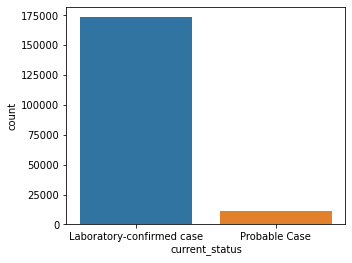

In [985]:
univariate_cat(data=df,x='current_status')

Total missing values : 1

Total count of unique categories: 5

Unique categories :
['Female', 'Male', 'Missing', 'Unknown', nan, 'Other']
value counts and %n             sex Percentage
Female   92108     50.02%
Male     91269     49.56%
Unknown    537      0.29%
Missing    238      0.13%
Other        2       0.0%
NaN          1        NaN


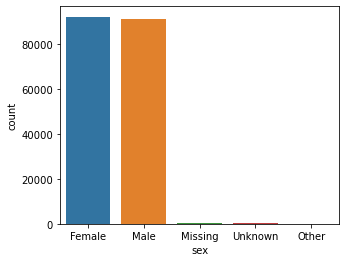

In [986]:
univariate_cat(data=df,x='sex')

Total missing values : 4

Total count of unique categories: 10

Unique categories :
['70 - 79 Years', '80+ Years', '50 - 59 Years', '60 - 69 Years', '40 - 49 Years', '20 - 29 Years', '30 - 39 Years', '0 - 9 Years', '10 - 19 Years', 'Unknown', nan]
value counts and %n                 age_group Percentage
80+ Years          37917     20.59%
70 - 79 Years      24085     13.08%
60 - 69 Years      23112     12.55%
20 - 29 Years      22170     12.04%
50 - 59 Years      21916      11.9%
30 - 39 Years      19374     10.52%
40 - 49 Years      19255     10.46%
10 - 19 Years      11770      6.39%
0 - 9 Years         4413       2.4%
Unknown              139      0.08%
NaN                    4        NaN


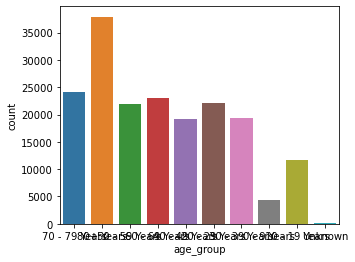

In [987]:
univariate_cat(data=df,x='age_group')

Total missing values : 1

Total count of unique categories: 9

Unique categories :
['White, Non-Hispanic', 'Black, Non-Hispanic', 'Asian, Non-Hispanic', 'Hispanic/Latino', 'Unknown', 'American Indian/Alaska Native, Non-Hispanic', 'Multiple/Other, Non-Hispanic', 'Missing', 'Native Hawaiian/Other Pacific Islander, Non-Hispanic', nan]
value counts and %n                                                      Race_ethinicity Percentage
White, Non-Hispanic                                           75938     41.24%
Unknown                                                       39585      21.5%
Hispanic/Latino                                               26330      14.3%
Black, Non-Hispanic                                           22485     12.21%
Multiple/Other, Non-Hispanic                                   6902      3.75%
Missing                                                        6789      3.69%
Asian, Non-Hispanic                                            4581      2.49%
American Indi

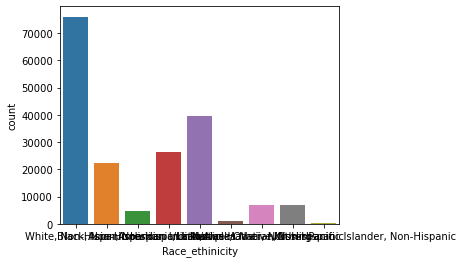

In [988]:
univariate_cat(data=df,x='Race_ethinicity')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['Yes', 'Unknown', 'Missing', 'No']
value counts and %n           hosp_yn Percentage
No         91217     49.53%
Yes        53384     28.99%
Unknown    20043     10.88%
Missing    19511     10.59%


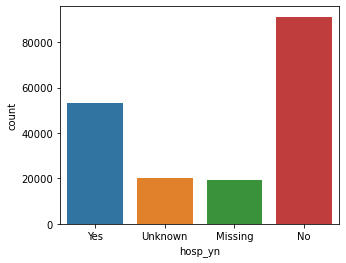

In [989]:
univariate_cat(data=df,x='hosp_yn')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['Missing', 'Unknown', 'No', 'Yes']
value counts and %n           icu_yn Percentage
Missing  103731     56.33%
Unknown   42300     22.97%
No        27584     14.98%
Yes       10540      5.72%


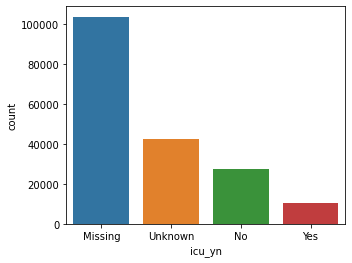

In [990]:
univariate_cat(data=df,x='icu_yn')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['Yes', 'No']
value counts and %n       death_yn Percentage
No     110724     60.13%
Yes     73431     39.87%


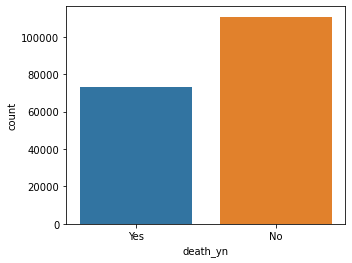

In [991]:
univariate_cat(data=df,x='death_yn')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['Missing', 'Yes', 'Unknown', 'No']
value counts and %n           medcond_yn Percentage
Missing      101496     55.11%
Yes           42408     23.03%
Unknown       21830     11.85%
No            18421      10.0%


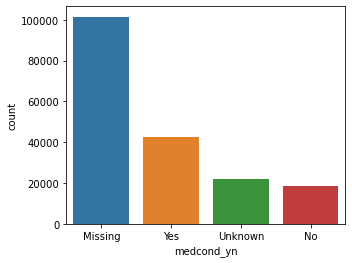

In [992]:
univariate_cat(data=df,x='medcond_yn')

### Bivariate Analysis

In [993]:
df.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race_ethinicity', 'hosp_yn', 'icu_yn', 'death_yn',
       'medcond_yn'],
      dtype='object')

#### Target variable in this situation is death_yn

#### Target variable must have strong correlation between the feature but the feature themselves must not have strong correlation

cat-cat<br>
cat-num/num-cat<br>
num-num<br>

In [1093]:
# cat-cat
pd.crosstab(df['death_yn'],df['sex'])

sex,Female,Male,Missing,Unknown
death_yn,,,,
No,14677,12586,41,43
Yes,5161,6357,8,38


In [1095]:
pd.crosstab(df['death_yn'],df['Race_ethinicity'])

Race_ethinicity,"American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic","Black, Non-Hispanic",Hispanic/Latino,Missing,"Multiple/Other, Non-Hispanic","Native Hawaiian/Other Pacific Islander, Non-Hispanic",Unknown,"White, Non-Hispanic"
death_yn,,,,,,,,,
No,138,739,2756,5595,114,665,174,4409,12757
Yes,65,361,1410,1305,96,440,63,1659,6165


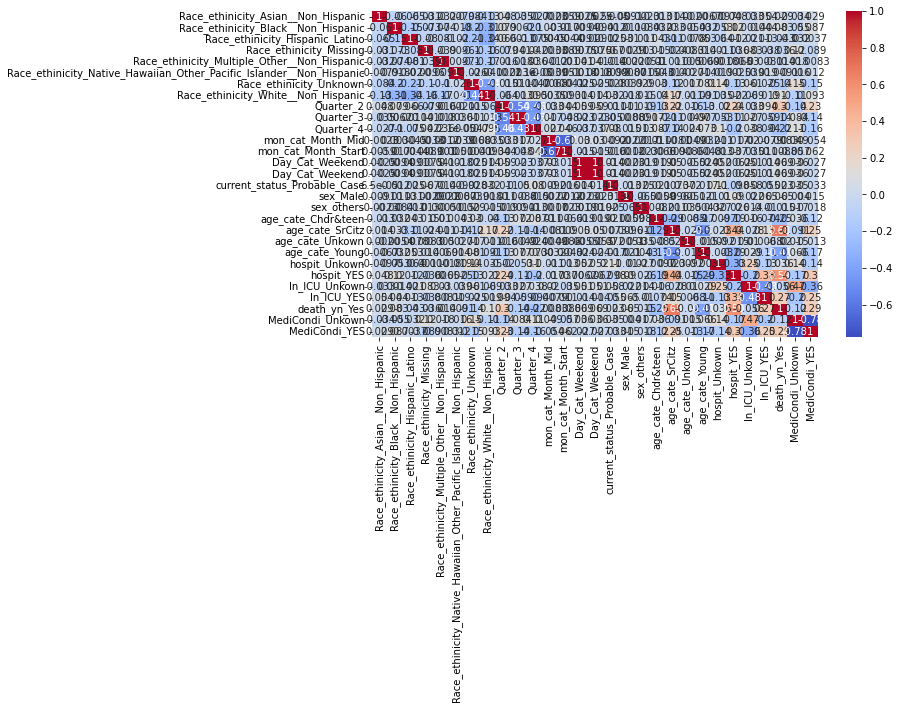

In [1101]:
plt.figure(figsize=(10,6))
cr=df2.corr()
sns.heatmap(cr,annot=True,cmap='coolwarm')
plt.show()

### Model Development

#### 1.Logistic Regression

In [1100]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [1111]:
y=df2['death_yn_Yes']
x=df2.drop(columns=['death_yn_Yes'])

In [1113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,
                                              random_state=0)

In [1114]:
logR=LogisticRegression()
logR.fit(x_train,y_train)

LogisticRegression()

In [1115]:
print('Train Score:',logR.score(x_train,y_train))
print('Test Score:',logR.score(x_test,y_test))

Train Score: 0.8856540878681688
Test Score: 0.8848150481113838


In [1116]:
pred_train=logR.predict(x_train)
pred_train

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [1117]:
act_pred_train=pd.DataFrame({'Act':y_train,'Pred':pred_train})
act_pred_train

,Act,Pred
68472,1,0
93414,0,0
81327,0,0
52227,1,1
51477,1,1
...,...,...
152315,0,0
176963,0,0
117952,0,0
173685,0,0


#### 1.1 Model Evaluation

##### confusion matrix

In [1119]:
pd.crosstab(act_pred_train['Act'],act_pred_train['Pred'])

Pred,0,1
Act,,
0,74549,8286
1,7507,47774


In [1120]:
conf_train=metrics.confusion_matrix(y_train,pred_train)
conf_train

array([[74549,  8286],
       [ 7507, 47774]], dtype=int64)

In [1121]:
pd.DataFrame(conf_train,columns=["Pred_0_neg","Pred_1_pos"],
            index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,74549,8286
Act_1_pos,7507,47774


In [1122]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     82835
           1       0.85      0.86      0.86     55281

    accuracy                           0.89    138116
   macro avg       0.88      0.88      0.88    138116
weighted avg       0.89      0.89      0.89    138116



In [1123]:
prob_train=pd.DataFrame(logR.predict_proba(x_train),columns=['prob_0','prob_1'])

In [1124]:
prob_train

,prob_0,prob_1
0,0.505420,0.494580
1,0.991004,0.008996
2,0.998302,0.001698
3,0.234274,0.765726
4,0.066890,0.933110
...,...,...
138111,0.996142,0.003858
138112,0.624424,0.375576
138113,0.993484,0.006516
138114,0.779667,0.220333


In [1125]:
new_pred_train=np.where(prob_train['prob_1']>.5,1,0)
print(metrics.classification_report(y_train,new_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     82835
           1       0.85      0.86      0.86     55281

    accuracy                           0.89    138116
   macro avg       0.88      0.88      0.88    138116
weighted avg       0.89      0.89      0.89    138116



### 2.Decision Tree

In [1126]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [1127]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [1128]:
print('Train Accuracy:',round(dt.score(x_train,y_train),2))
print('Test Accuracy:',round(dt.score(x_test,y_test),2))

Train Accuracy: 0.9
Test Accuracy: 0.89


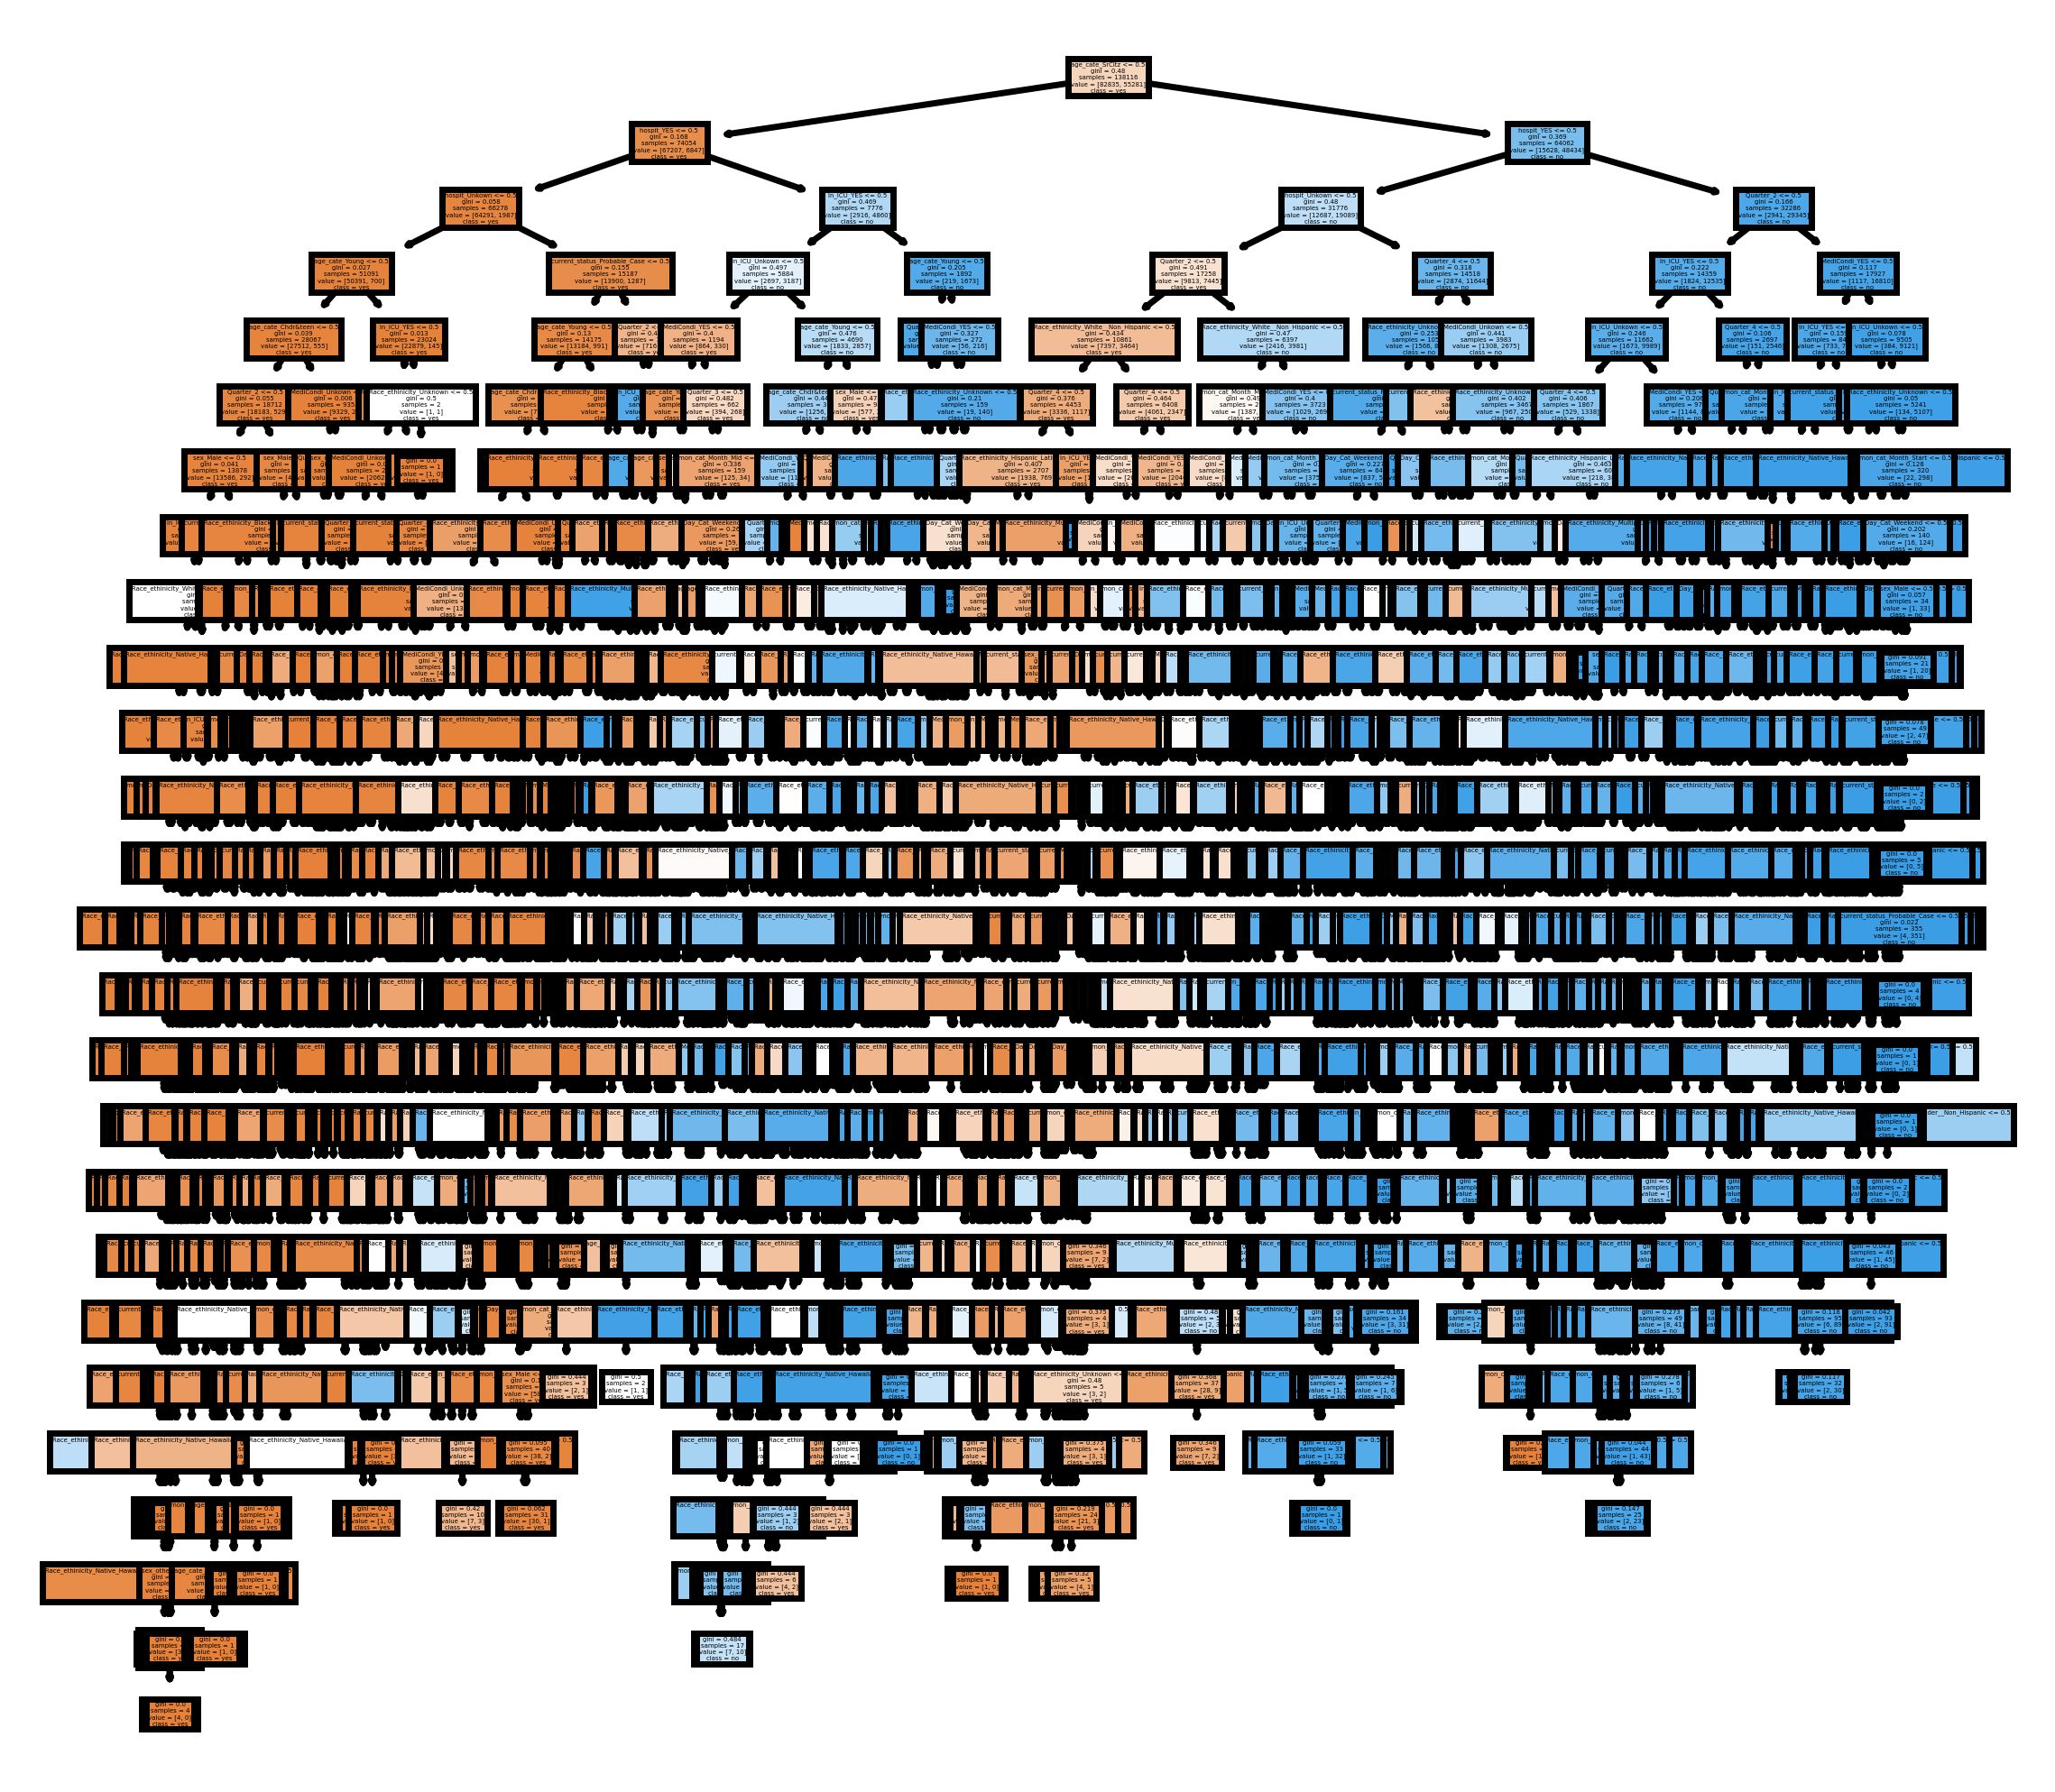

In [1129]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']
# Setting dpi= 300 to make image clearer than default
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5), dpi=500)

dt_plot=plot_tree(dt,
                 feature_names=fn,
                 class_names=cn,
                 filled=True);

In [1130]:
dt1=DecisionTreeClassifier(min_samples_split=150)
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 89.60000000000001%
Test Accuracy: 89.1%


In [1131]:
dt1=DecisionTreeClassifier(min_samples_leaf=50)
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 89.4%
Test Accuracy: 89.1%


In [1132]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 90.5%
Test Accuracy: 88.6%


In [1134]:
dt1=DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 90.5%
Test Accuracy: 88.5%


### Grid Search and Random Search

In [1135]:
from sklearn.model_selection import GridSearchCV

params={
    'criterion':['gini','entropy'],
    'max_depth':[5,7,9,10,11],
    'min_samples_split':[10,15,20,50,100,200,250],
    'min_samples_leaf':[5,10,15,20,50,80,100]}
dtg=DecisionTreeClassifier()
    
gd_search=GridSearchCV(estimator=dtg,param_grid=params,cv=10,n_jobs=-1,verbose=2)

gd_search.fit(x_train,y_train)
    

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [1136]:
# k-fold cross validation:it is a technique of overfitting
# cv: Cross Validation =10
# for 10000 records it will divide into 10 parts since cv is 10
#     10000:1000*10


In [1137]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 100}

In [1138]:
gd_search.best_score_

0.8924743988614823

In [1139]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, min_samples_split=100)

In [1140]:
gd_search

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [1141]:
pd.DataFrame(gd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.546164,0.006942,0.010693,0.002684,gini,5,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.889661,...,0.893209,0.883073,0.888068,0.887047,0.88444,0.888205,0.890956,0.888536,0.002918,393
1,0.545564,0.005025,0.009694,0.000900,gini,5,5,15,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.889661,...,0.893209,0.883073,0.888068,0.887047,0.88444,0.888205,0.890956,0.888536,0.002918,393
2,0.541966,0.004645,0.009794,0.001167,gini,5,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.889661,...,0.893209,0.883073,0.888068,0.887047,0.88444,0.888205,0.890956,0.888536,0.002918,393
3,0.546763,0.005537,0.009694,0.000900,gini,5,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.889661,...,0.893209,0.883073,0.888068,0.887047,0.88444,0.888205,0.890956,0.888536,0.002918,393
4,0.549461,0.009759,0.009595,0.000490,gini,5,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.889661,...,0.893209,0.883073,0.888068,0.887047,0.88444,0.888205,0.890956,0.888536,0.002918,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.881356,0.050779,0.010695,0.001100,entropy,11,100,20,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.894295,...,0.894874,0.883869,0.890747,0.890160,0.88806,0.892115,0.892622,0.891461,0.003261,173
486,0.879856,0.036324,0.010295,0.001675,entropy,11,100,50,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.894295,...,0.894874,0.883869,0.890747,0.890160,0.88806,0.892115,0.892622,0.891461,0.003261,173
487,0.847477,0.068467,0.011294,0.001615,entropy,11,100,100,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.894295,...,0.894874,0.883869,0.890747,0.890160,0.88806,0.892115,0.892622,0.891461,0.003261,173
488,0.906742,0.035172,0.010994,0.000894,entropy,11,100,200,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.894295,...,0.894874,0.883869,0.890747,0.890160,0.88806,0.892115,0.892622,0.891461,0.003261,173


In [1150]:
dt_f=DecisionTreeClassifier(criterion='gini',max_depth=11,
                           min_samples_leaf=10,
                           min_samples_split=100)
dt_f.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, min_samples_split=100)

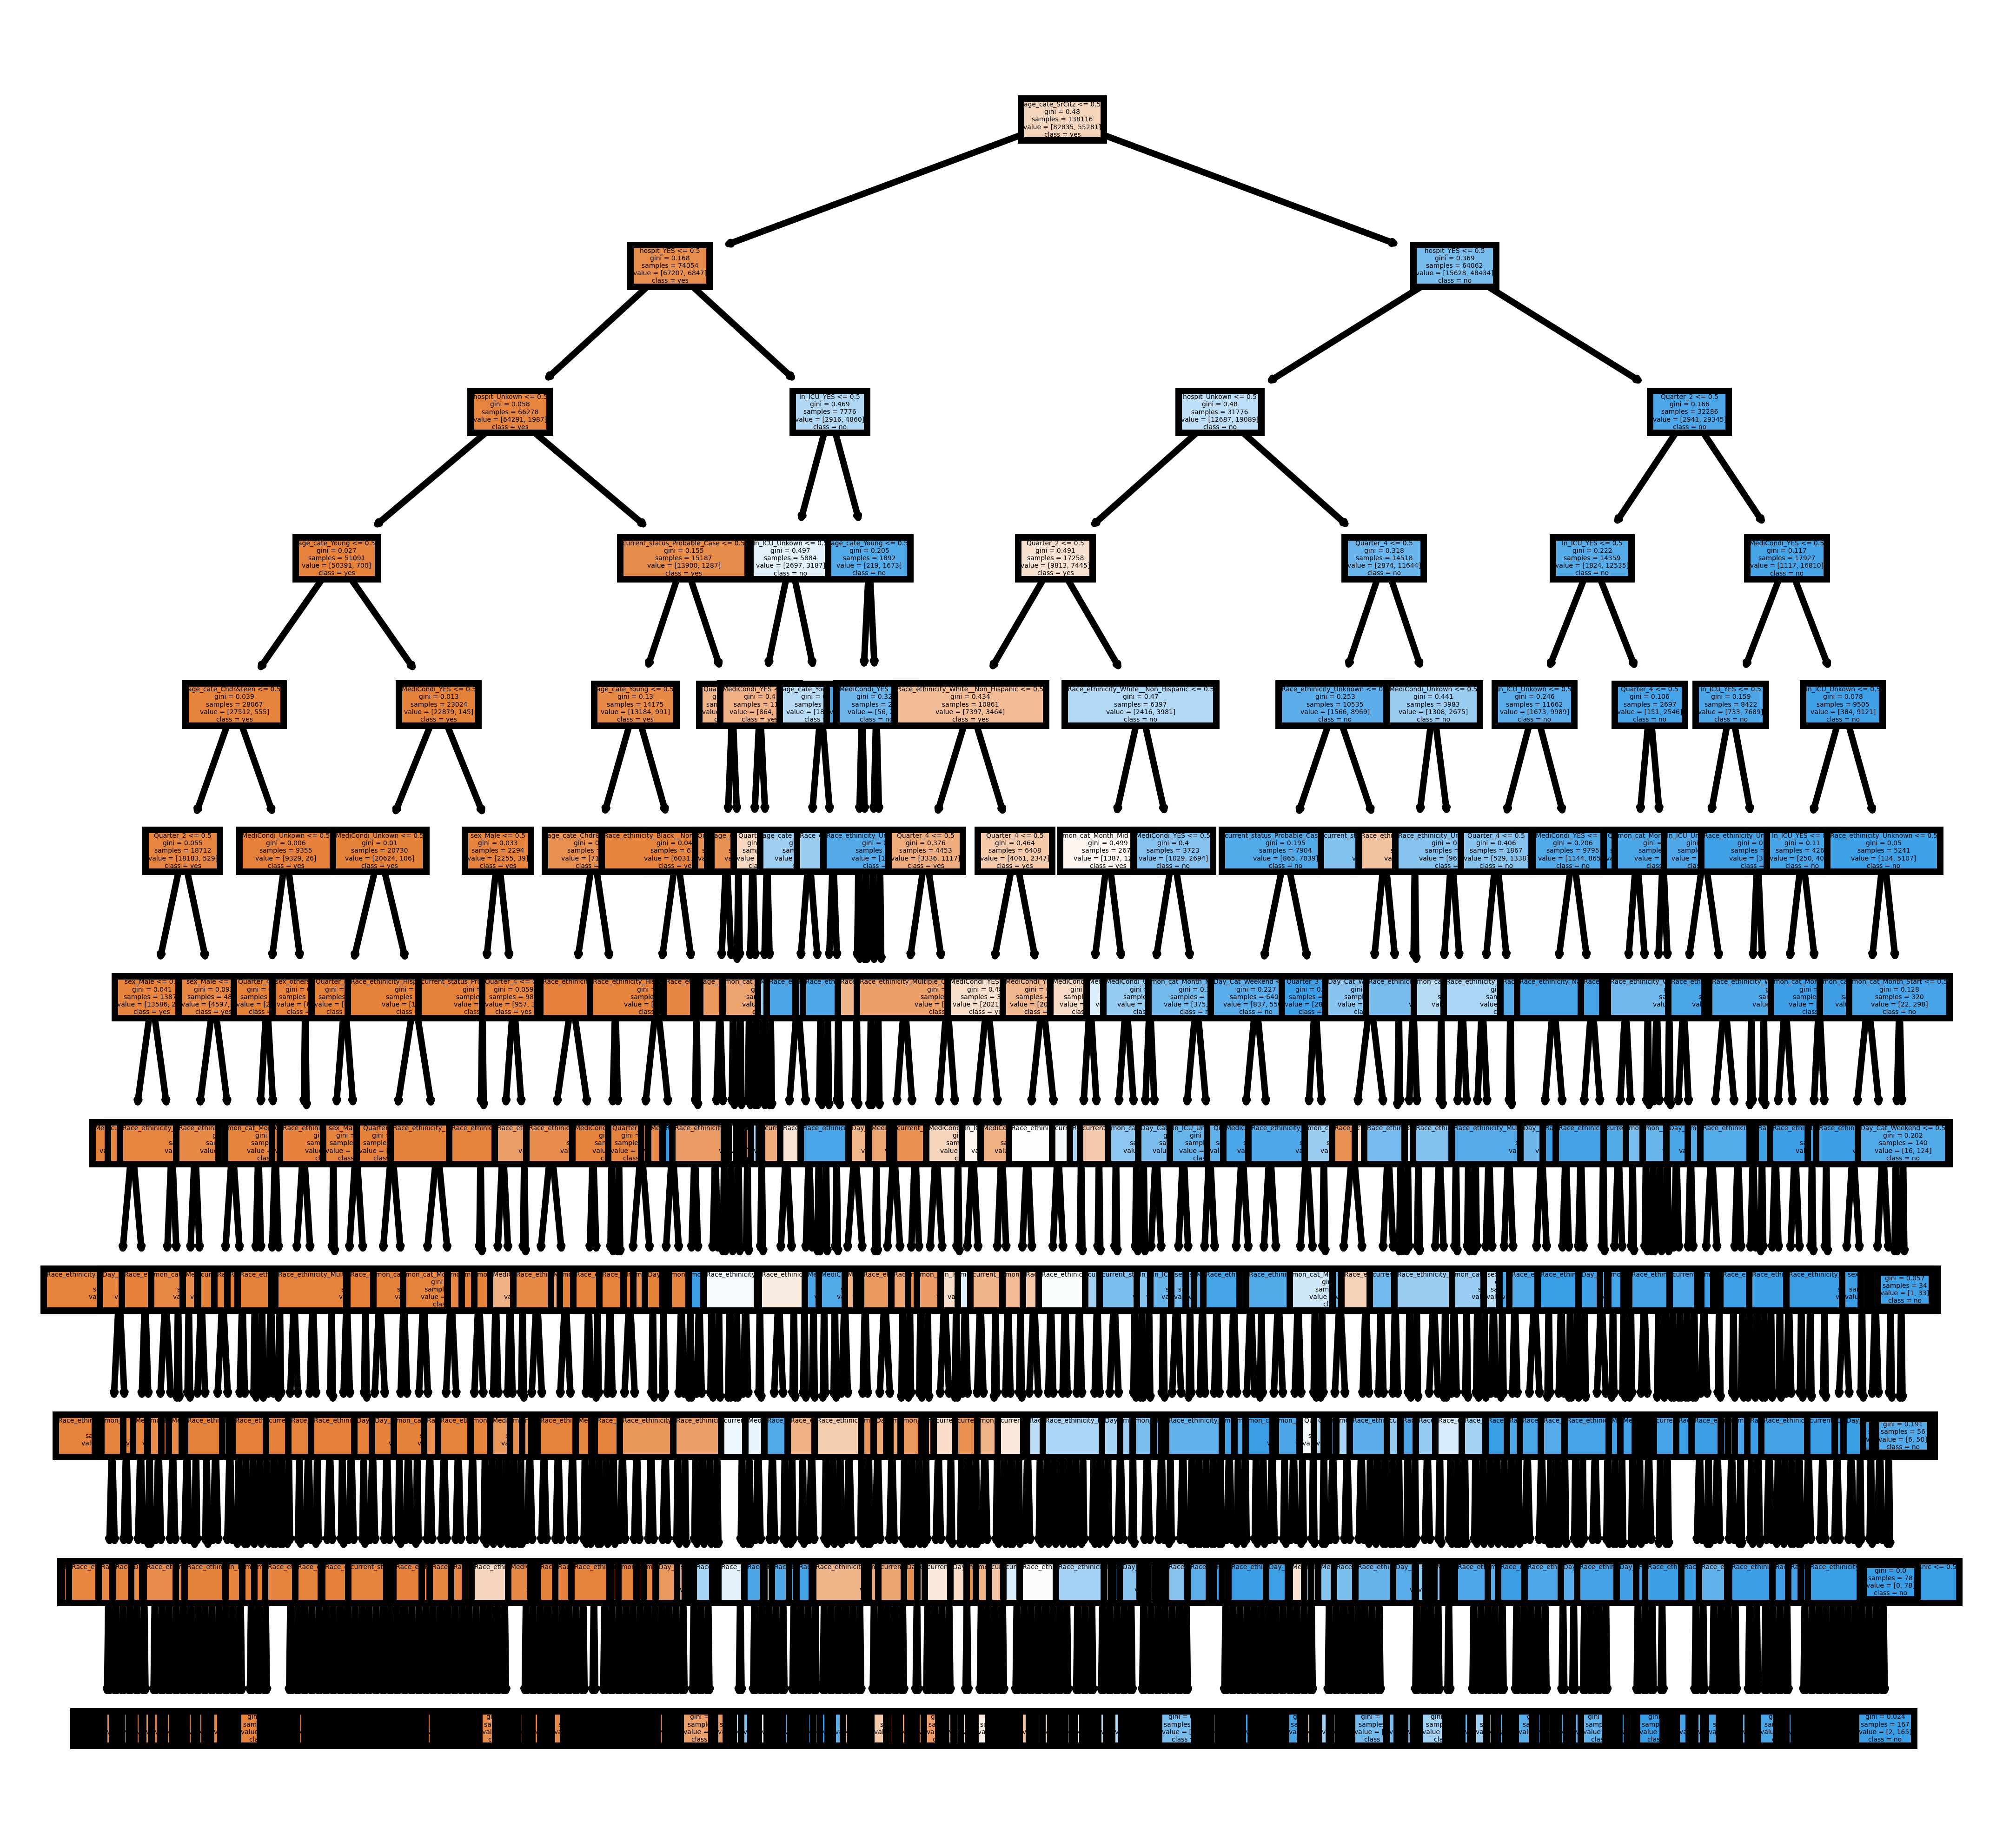

In [1151]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']
# Setting dpi= 300 to make image clearer than default
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5), dpi=1000)

dt_plot=plot_tree(dt_f,
                 feature_names=fn,
                 class_names=cn,
                 filled=True);

In [ ]:
#### Feature Importance

In [1152]:
dt_f.feature_importances_

array([3.12210217e-04, 8.11659855e-04, 8.20389256e-04, 4.63024048e-04,
       9.81200807e-04, 1.24202209e-05, 5.68409439e-03, 6.21323538e-03,
       2.40147350e-02, 2.17824694e-03, 7.90324136e-03, 2.65059502e-03,
       1.90653020e-03, 1.47935228e-03, 9.11795805e-04, 4.61916535e-03,
       2.29901575e-03, 3.38393877e-05, 3.70215662e-03, 6.70676767e-01,
       0.00000000e+00, 4.20772050e-03, 5.06511201e-02, 1.76695629e-01,
       8.31697787e-03, 8.58778861e-03, 6.91119608e-03, 6.95589210e-03])

In [1153]:
feat_imp=pd.DataFrame({'Variable':x_train.columns,
             'Imp':dt_f.feature_importances_}).sort_values(by='Imp',ascending=False)
feat_imp

,Variable,Imp
19,age_cate_SrCitz,0.670677
23,hospit_YES,0.176696
22,hospit_Unkown,0.050651
8,Quarter_2,0.024015
25,In_ICU_YES,0.008588
24,In_ICU_Unkown,0.008317
10,Quarter_4,0.007903
27,MediCondi_YES,0.006956
26,MediCondi_Unkown,0.006911
7,Race_ethinicity_White__Non_Hispanic,0.006213


In [1155]:
feat_imp[feat_imp['Imp']>=0.01]

,Variable,Imp
19,age_cate_SrCitz,0.670677
23,hospit_YES,0.176696
22,hospit_Unkown,0.050651
8,Quarter_2,0.024015


In [1156]:
feat_imp[feat_imp['Imp']>=0.01]['Variable'].unique()

array(['age_cate_SrCitz', 'hospit_YES', 'hospit_Unkown', 'Quarter_2'],
      dtype=object)

<AxesSubplot:xlabel='Variable', ylabel='Imp'>

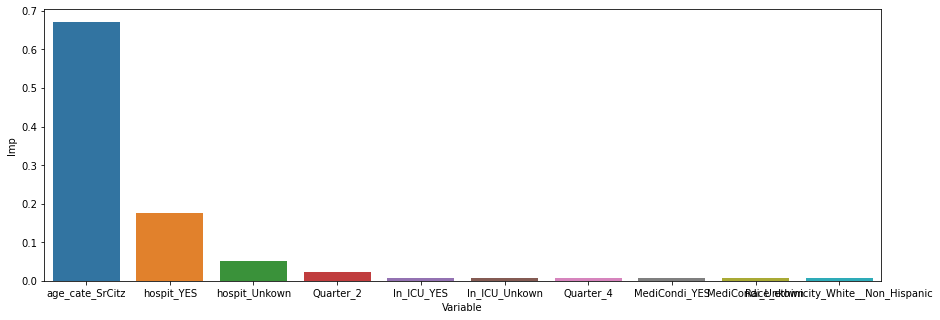

In [1157]:
plt.figure(figsize=(15,5))
sns.barplot(data=feat_imp.head(10),x='Variable',y='Imp')

In [1158]:
feat_imp[feat_imp['Imp']>=0.01]['Variable'].unique()

array(['age_cate_SrCitz', 'hospit_YES', 'hospit_Unkown', 'Quarter_2'],
      dtype=object)

In [1159]:
x_train1=x_train[['age_cate_SrCitz', 'hospit_YES', 'hospit_Unkown', 'Quarter_2']]
x_test1=x_test[['age_cate_SrCitz', 'hospit_YES', 'hospit_Unkown', 'Quarter_2']]

In [1160]:
dt_f=DecisionTreeClassifier(criterion='gini',max_depth=11,
                           min_samples_leaf=10,
                           min_samples_split=100)
dt_f.fit(x_train1,y_train)
print('Train Accuracy:',str(round(dt_f.score(x_train1,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt_f.score(x_test1,y_test),3)*100)+str('%'))


Train Accuracy: 88.0%
Test Accuracy: 87.8%


In [1161]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)


In [1162]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [1163]:
metrics.accuracy_score(y_train,pred_train)
metrics.accuracy_score(y_test,pred_test)


0.8781033471621886

In [1164]:
metrics.recall_score(y_train,pred_train)
metrics.recall_score(y_test,pred_test)

0.8974104683195592

In [1165]:
metrics.precision_score(y_train,pred_train)
metrics.precision_score(y_test,pred_test)

0.8128555744086237

In [1166]:
metrics.f1_score(y_train,pred_train)
metrics.f1_score(y_test,pred_test)

0.8530428406829371

In [1167]:
metrics.roc_auc_score(y_train,pred_train)

0.8834129858096977

In [1168]:
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)    
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    auc1=metrics.roc_auc_score(act,pred)
    result={'Accuracy':ac1,'Recall':rc1,'Precision':pc1,'F1 score':f1,"AUC":auc1}
    
    fpr,tpr,threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

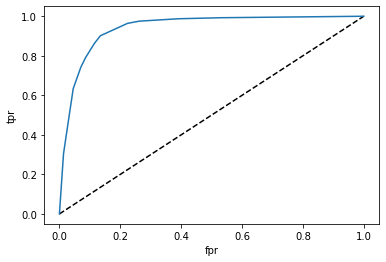

{'Accuracy': 0.8798256537982565,
 'Recall': 0.9013946925706843,
 'Precision': 0.8171933679912098,
 'F1 score': 0.8572313303170533,
 'AUC': 0.8834129858096977}

In [1169]:
classification_eva(y_train,pred_train,probs=prob_train_1)

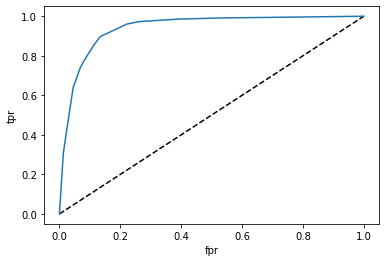

{'Accuracy': 0.8781033471621886,
 'Recall': 0.8974104683195592,
 'Precision': 0.8128555744086237,
 'F1 score': 0.8530428406829371,
 'AUC': 0.8814744263143925}

In [1170]:
classification_eva(y_test,pred_test,probs=prob_test_1)

#### Ensemble

### RandomForest

In [1142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV , train_test_split, RandomizedSearchCV

In [1143]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [1145]:
print('Train_score',rfr.score(x_train,y_train))
print('Test_score',rfr.score(x_test,y_test))

Train_score 0.7143891992678395
Test_score 0.6530494797383345


In [1146]:
pred_train=rfr.predict(x_train)
pred_train

array([0.79176062, 0.        , 0.        , ..., 0.02835087, 0.        ,
       0.9151299 ])

In [1147]:
pred_test=rfr.predict(x_test)
pred_test

array([0.98668781, 0.97506636, 0.00770199, ..., 0.        , 0.03478626,
       0.        ])

In [1148]:
# for train data 
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 0.06856088415585229
Train rmse 0.2618413339330754
Train MAE 0.139177278715725
Train MAPE inf


In [1149]:
# for test data 
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 0.08285626475850723
Test rmse 0.28784764157190385
Test MAE 0.1534791478218553
Test MAPE inf
